In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

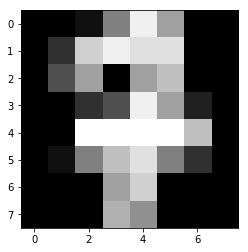

In [4]:
idx = 17
plt.imshow(digits['images'][idx], cmap=plt.cm.gray, interpolation='none')

In [5]:
digits['target'][idx]

7

In [6]:
digits['images'].shape

(1797, 8, 8)

In [7]:
digits['data'].shape

(1797, 64)

In [8]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

Using TensorFlow backend.


In [9]:
X = digits['data']
y = digits['target']

In [10]:
y = np_utils.to_categorical(y)

In [11]:
y[0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
in_dim = X.shape[1]
out_dim = y.shape[1]

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [15]:
model = Sequential()
model.add(Dense(128, input_shape=(in_dim,)))
model.add(Activation('relu'))
model.add(Dense(out_dim))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train)

Epoch 1/10
1257/1257 [==============================] - 0s - loss: 2.1001 - acc: 0.1925     
Epoch 2/10
1257/1257 [==============================] - 0s - loss: 0.7290 - acc: 0.7375     
Epoch 3/10
1257/1257 [==============================] - 0s - loss: 0.2201 - acc: 0.9236     
Epoch 4/10
1257/1257 [==============================] - 0s - loss: 0.1313 - acc: 0.9562     
Epoch 5/10
1257/1257 [==============================] - 0s - loss: 0.0820 - acc: 0.9730     
Epoch 6/10
1257/1257 [==============================] - 0s - loss: 0.0650 - acc: 0.9849     
Epoch 7/10
1257/1257 [==============================] - 0s - loss: 0.0380 - acc: 0.9968     
Epoch 8/10
1257/1257 [==============================] - 0s - loss: 0.0303 - acc: 0.9952     
Epoch 9/10
1257/1257 [==============================] - 0s - loss: 0.0233 - acc: 0.9992     
Epoch 10/10
1257/1257 [==============================] - 0s - loss: 0.0191 - acc: 0.9984     


In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

 32/540 [>.............................] - ETA: 0s

0.95555555643858736

In [18]:
model.predict(X_test[:3])

array([[  2.14247790e-04,   1.85282109e-10,   6.48022080e-09,
          1.81648920e-06,   4.10720125e-09,   2.81022102e-01,
          1.06778589e-05,   8.83023210e-10,   5.13918259e-08,
          2.01377952e-05],
       [  7.01571071e-06,   1.07857568e-06,   1.89376359e-09,
          1.24478859e-07,   1.25337437e-01,   1.20767327e-05,
          4.02553610e-07,   2.84342168e-05,   2.23791521e-05,
          1.49548214e-04],
       [  3.81247401e-02,   1.16234323e-12,   2.71174971e-09,
          5.22792608e-11,   5.92462399e-08,   1.34071939e-07,
          3.12828092e-08,   2.49844520e-11,   4.11469117e-08,
          4.37735999e-08]], dtype=float32)

In [19]:
model.predict(X_test[:3]).argmax(axis=1)

array([5, 4, 0], dtype=int64)

In [20]:
y_test[:3].argmax(axis=1)

array([5, 4, 0], dtype=int64)

In [21]:
model.save('digits.h5')

In [22]:
from keras.models import load_model
model1 = load_model('digits.h5')

In [23]:
model1.predict(X_test[:3]).argmax(axis=1)

array([5, 4, 0], dtype=int64)